In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
file_path = 'fake_job_postings.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [7]:
df.select_dtypes(include=['object','bool']).columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [10]:
print(df.isnull().sum())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
description_clean          0
dtype: int64


<Axes: >

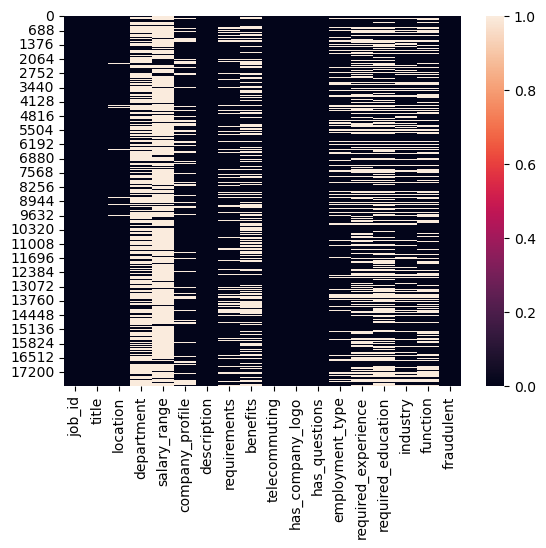

In [12]:
sns.heatmap(df.isnull())

In [13]:
# filling missing values
df.fillna(' ',inplace=True)

<Axes: >

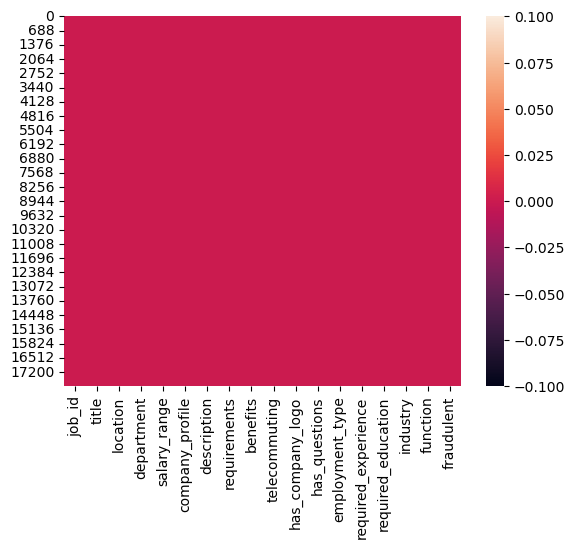

In [14]:
sns.heatmap(df.isnull())

In [11]:
#Value counts of target column
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# DATA CLEANING 

In [23]:
# 1. drop columns

col_to_drop = ['job_id','salary_range','telecommuting','has_company_logo','has_questions','employment_type','required_experience',
               'required_education']

df.drop(columns=col_to_drop,axis=1,inplace=True,errors='ignore')

df.columns



Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'industry', 'function', 'fraudulent', 'description_clean',
       'text_combined'],
      dtype='object')

In [24]:
# 2. dropping rows where description is missing (imp for nlp)

df.dropna(subset = ['description'],inplace=True)

df.isnull().sum()

title                   0
location                0
company_profile      3307
description             0
requirements         2694
industry             4902
function             6454
fraudulent              0
description_clean       0
text_combined           0
dtype: int64

In [25]:
## now again we have, some missing values

df['location'].fillna('Unknown', inplace=True)

In [27]:
## 4. merging userful text fields

df['text_combined'] = (
    df['title'].astype(str) + ' ' +
    df['company_profile'].astype(str) + ' ' +
    df['description'].astype(str) + ' ' +
    df['requirements'].astype(str)
)


## final column for nlp
df_final = df[['text_combined', 'fraudulent']]


In [28]:
df_final.head()

,text_combined,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


In [29]:
df_final['fraudulent'].value_counts()

0    17014
1      865
Name: fraudulent, dtype: int64

# Text Preprocessing (NLP Cleaning)

In [30]:
##Lowercase text

#Remove punctuation, numbers, special characters

#Remove stopwords (common words like “and”, “the”, etc.)

#Apply stemming (reduces words like “running”, “runs” → “run”)

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z ]', ' ', text)  # Remove punctuation and numbers
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
df_final['text_clean'] = df_final['text_combined'].apply(clean_text)


C:\Users\Sneha\AppData\Local\Temp\ipykernel_16872\4241567961.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['text_clean'] = df_final['text_combined'].apply(clean_text)


In [32]:
print(df_final[['text_combined', 'text_clean']].head(1))


                                       text_combined  \
0  Marketing Intern We're Food52, and we've creat...   

                                          text_clean  
0  market intern food creat groundbreak award win...  


#  Convert Text to Numbers (Vectorization with TF-IDF)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Adjust features & ngrams if needed

X = tfidf.fit_transform(df_final['text_clean'])  # Features matrix
y = df_final['fraudulent']                       # Target vector

print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (17879, 5000)


# Split Data & Train Your ML Model

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [36]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9720357941834452
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       0.99      0.43      0.60       173

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.97      3576



In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       0.99      0.43      0.60       173

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.97      3576



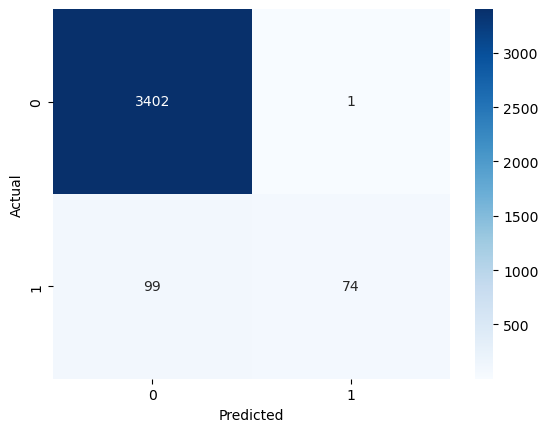

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [39]:
import joblib

joblib.dump(model, 'fraud_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']